In [ ]:
#choosing_right_number_of_clusters

In [ ]:
#pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
#Exploring 1000 song dataset

In [ ]:
df_1000 = pd.read_csv("df_audio_features_1000.csv")

In [ ]:
df_1000 ['title'] = df_1000['name'] + ' - ' + df_1000['artist']

In [ ]:
df_1000.set_index('title', inplace=True)

In [ ]:
#dropping following columns from 1000 songs df

In [ ]:
df_1000.drop(['type','id','html','name','artist'],axis=1, inplace=True)

In [11]:
df_1000

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes - The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me - Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [12]:
df1000songs=df_1000.copy()

In [13]:
df1000songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes - The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me - Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


Scale data I would suggest 5 n_clusters for 1000 songs here,
since our "project-case" suggest to have like 200-250 songs per cluster.

In [14]:
# To get used to the "raw numbers":
df1000songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000
mean,0.538917,0.494241,5.154861,-11.098032,0.663194,0.086273,0.469774,0.188482,0.174391,0.472576,115.249066,2.912083e+05,3.889583
std,0.219193,0.281917,3.540932,6.979107,0.472782,0.086193,0.374637,0.336594,0.146007,0.287807,31.611805,2.280920e+05,0.446937
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,6.275800e+04,1.000000
25%,0.386000,0.243000,2.000000,-14.927250,0.000000,0.038400,0.083025,0.000000,0.090700,0.214750,91.014250,1.930300e+05,4.000000
50%,0.562000,0.529500,5.000000,-8.939500,1.000000,0.048200,0.419000,0.000127,0.118000,0.476500,110.008000,2.336965e+05,4.000000
75%,0.710250,0.733000,8.000000,-5.677250,1.000000,0.088825,0.869250,0.159750,0.203000,0.720000,135.587000,3.080625e+05,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,3.815787e+06,5.000000


In [ ]:
#scalling

In [15]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

scaled_df = my_scaler.fit_transform(df1000songs)

In [16]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
Smoke Gets In Your Eyes - The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
Dream A Little Dream Of Me - Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50


In [ ]:
#creating clusters

In [17]:
from sklearn.cluster import KMeans

my_model = KMeans(n_clusters=5, random_state=123)

my_model.fit(scaled_df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-8 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 1568, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3:

KMeans(n_clusters=5, random_state=123)

In [ ]:
#Adding column clusters

In [18]:
scaled_df_without_clusters = scaled_df.copy()

In [19]:
scaled_df['cluster']  = my_model.labels_

In [21]:
scaled_df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
title,,,,,,,,,,,,,,
Someone You Loved - Lewis Capaldi,0.488058,0.406614,0.090909,0.851311,1.0,0.015738,0.754015,0.000000,0.087421,0.441682,0.384373,0.031815,0.75,0
If You Leave Me Now - Chicago,0.413976,0.565252,1.000000,0.827021,1.0,0.006512,0.019777,0.000837,0.111272,0.264554,0.347929,0.045994,0.75,4
A Warrior's Call - Volbeat,0.347634,0.906625,0.909091,0.877448,1.0,0.107272,0.000751,0.000006,0.231567,0.424073,0.379437,0.053376,0.50,4
Insane in the Brain - Cypress Hill,0.925918,0.613446,1.000000,0.745576,1.0,0.339725,0.029215,0.188832,0.071243,0.776259,0.335932,0.038771,0.75,4
Lose Control (feat. Ciara & Fat Man Scoop) - Missy Elliott,0.933658,0.816261,0.363636,0.819964,0.0,0.176918,0.031223,0.007076,0.027377,0.818728,0.483783,0.043726,0.75,2
Dance (A$$) Remix - Big Sean,0.804290,0.732926,1.000000,0.826933,0.0,0.591172,0.027709,0.001594,0.064399,0.745183,0.703187,0.041975,0.75,2
I'm Gonna Get Married - Lloyd Price,0.563246,0.516054,0.636364,0.770196,1.0,0.018452,0.768072,0.000000,0.114383,0.632277,0.445838,0.021381,0.75,0
YOUTH - Troye Sivan,0.627377,0.752003,0.636364,0.878262,1.0,0.033104,0.052809,0.000000,0.057658,0.609488,0.267092,0.032623,0.75,4
"Milestones (feat. John Coltrane, Cannonball Adderley, Red Garland, Paul Chambers & Philly Joe Jones) - Miles Davis",0.545555,0.548184,0.818182,0.812183,0.0,0.019718,0.440762,0.000565,0.151716,0.704786,0.437513,0.074422,0.75,2


In [ ]:
#Exploring the mean of data

In [ ]:
#Comparing clusters

<Axes: >

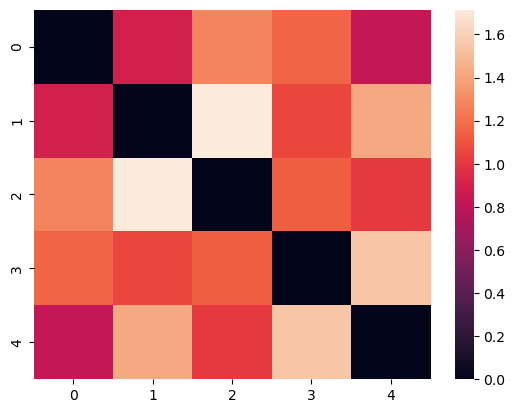

In [24]:
from sklearn.metrics import pairwise_distances

distances_centroids = pairwise_distances(my_model.cluster_centers_)
sns.heatmap(distances_centroids)

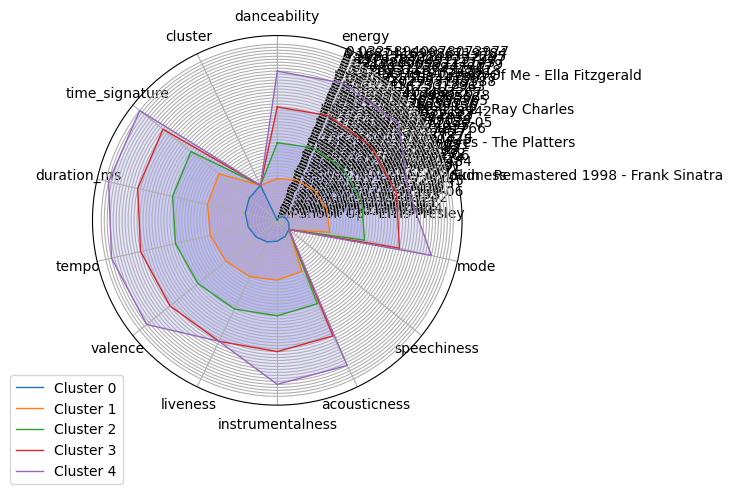

In [30]:
 #Making radar plot
from math import pi
radar_df = scaled_df.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()

In [ ]:
 #Making radar plot

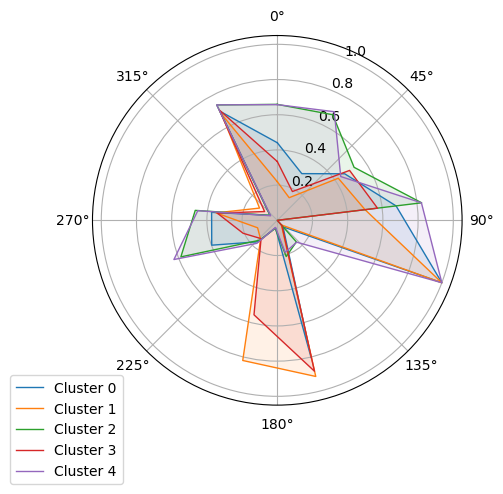

In [32]:
from math import pi
import matplotlib.pyplot as plt


num_clusters = 5

# Initialize the radar plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# What will be the angle of each axis in the plot?
categories = radar_df.columns.tolist()[:-1]  # Exclude the 'cluster' column
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot each cluster individually
for cluster_num in range(num_clusters):
    values = radar_df[radar_df['cluster'] == cluster_num].drop('cluster', axis=1).mean().values.flatten().tolist()
    values += values[:1]  # To close the polygon
    ax.plot(angles, values, linewidth=1, linestyle=None, label=f"Cluster {cluster_num}")
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [ ]:
#Calculating inertia

In [ ]:
#A for loop to compute the clustering for each value and append the inertia into a list should do the trick.
#We will use the range() function to generate a list of values between 1 and 30, and input this value to the n_clusters in each iteration:

In [ ]:
max_clusters = 30

inertia_list = []

for i in range(1,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  inertia_list.append(round(model_loop.inertia_,3))

In [34]:
print(inertia_list)


[1353.846, 960.07, 735.174, 633.362, 566.945, 519.431, 481.797, 458.563, 437.394, 418.388, 404.553, 391.112, 382.704, 372.237, 361.676, 350.233, 345.313, 333.064, 330.998, 320.421, 317.347, 312.171, 302.985, 300.541, 295.727, 293.168, 286.779, 282.91, 281.637]


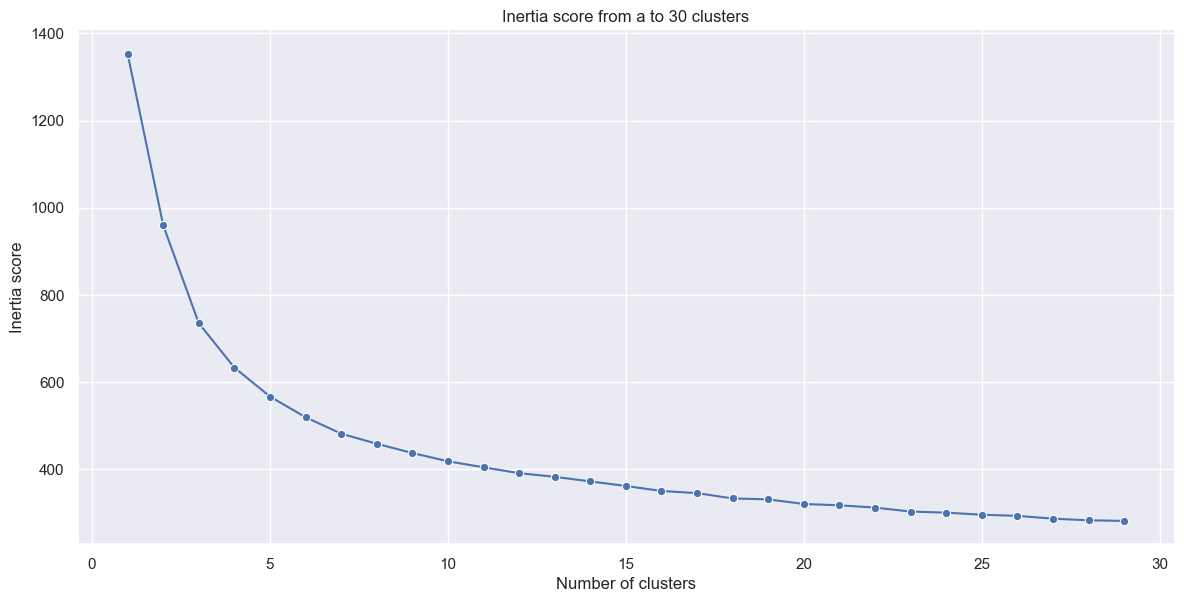

In [35]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,max_clusters),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In this line plot, with the number of clusters (k) represented in the x axis and the inertia represented in the y axis, we are looking for an elbow, as in the moment where the decline stops being sharp to become smooth and gradual:

One might argue that the elbow happens at k=4 or at k=5. It is a pity, since we are looking for a good value between 6 and 30.

#Silhouette score
To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset, and the labels they were assigned:

In [36]:
silhouette_score(scaled_df_without_clusters,my_model.labels_)

0.27601273676638016

In [37]:
max_clusters = 29

silhouette_list = []

for i in range(2,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  score = silhouette_score(scaled_df_without_clusters,model_loop.labels_)
  silhouette_list.append(round(score,2))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

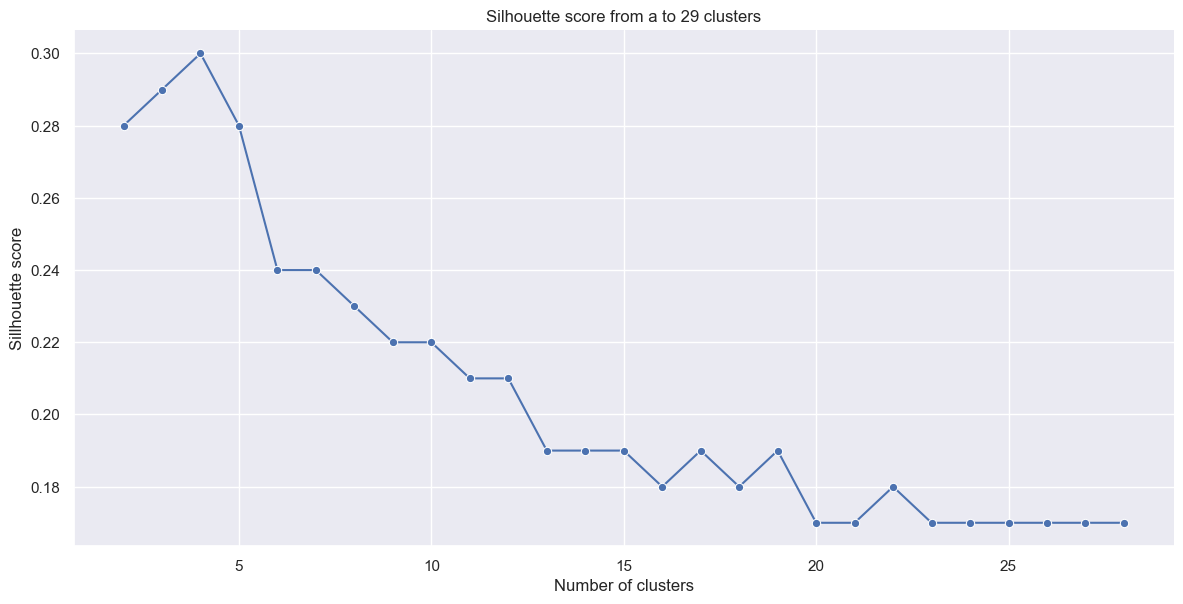

In [39]:
#If you were able to plot the inertia values for all values of K from 1 to 30, you should be able to do the same for the silhouette coefficients. Here, you will not be looking for elbows, but for local maxima.

sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);